#  GOLDEN TASK 2 - Customer Lifetime Value Analysis for Segmented Customer

**LOADING THE LIBRARIES**

In [47]:
import numpy as np
import pandas as pd

**LOADING AND EXPLORING THE DATA**

In [5]:
data = pd.read_csv("/kaggle/input/mutual-funds-india-detailed/comprehensive_mutual_funds_data.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [7]:
data.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


**EXPLORING DATA DISTRIBUTION IN CATEGORICAL COLUMNS**

In [9]:
data['category'].value_counts()

category
Equity               308
Debt                 282
Hybrid               116
Other                 80
Solution Oriented     28
Name: count, dtype: int64

In [10]:
data['sub_category'].value_counts()

sub_category
Sectoral / Thematic Mutual Funds                  82
ELSS Mutual Funds                                 52
FoFs Domestic                                     35
Liquid Mutual Funds                               34
Index Funds                                       30
Aggressive Hybrid Mutual Funds                    30
Large Cap Mutual Funds                            28
Overnight Mutual Funds                            26
Small Cap Mutual Funds                            25
Ultra Short Duration Funds                        25
Large & Mid Cap Funds                             24
Mid Cap Mutual Funds                              23
Short Duration Funds                              23
Arbitrage Mutual Funds                            22
Flexi Cap Funds                                   22
Dynamic Bond                                      22
Banking and PSU Mutual Funds                      21
Equity Savings Mutual Funds                       21
Low Duration Funds               

In [11]:
data['scheme_name'].value_counts()

scheme_name
SBI Long Term Advantage Fund              6
ICICI Pru Retirement Fund                 4
Sundaram LT MC Tax Advantage Fund         3
AXIS Retirement Savings Fund              3
Tata Retirement Savings Fund              3
                                         ..
HSBC Flexi Debt Fund                      1
HSBC Gilt Fund                            1
HSBC Infrastructure Fund                  1
HSBC Large & Mid Cap Fund                 1
WhiteOak Capital Ultra Short Term Fund    1
Name: count, Length: 789, dtype: int64

In [12]:
data['amc_name'].value_counts()

amc_name
ICICI Prudential Mutual Fund         57
Aditya Birla Sun Life Mutual Fund    49
SBI Mutual Fund                      48
Sundaram Mutual Fund                 42
Nippon India Mutual Fund             39
HDFC Mutual Fund                     38
UTI Mutual Fund                      37
HSBC Mutual Fund                     35
Axis Mutual Fund                     35
DSP Mutual Fund                      35
Tata Mutual Fund                     34
Kotak Mahindra Mutual Fund           32
Invesco Mutual Fund                  27
Franklin Templeton Mutual Fund       26
Baroda BNP Paribas Mutual Fund       24
LIC Mutual Fund                      20
Edelweiss Mutual Fund                20
PGIM India Mutual Fund               18
IDBI Mutual Fund                     18
Mirae Asset Mutual Fund              18
Canara Robeco Mutual Fund            18
Motilal Oswal Mutual Fund            16
Union Mutual Fund                    16
Bank of India Mutual Fund            15
Mahindra Manulife Mutual Fund  

In [13]:
data.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [19]:
data['sortino'].value_counts()

sortino
-        23
3.24      8
3.44      8
3.33      7
3.73      7
         ..
7.27      1
2.73      1
1.31      1
-1.02     1
-0.53     1
Name: count, Length: 385, dtype: int64

In [20]:
#data['sortino'] = data['sortino'].astype(float)
#data['alpha'] = data['alpha'].astype(float)
#data['sd'] = data['sd'].astype(float)
#data['beta'] = data['beta'].astype(float)
#data['sharpe'] = data['sharpe'].astype(float)

**HANDLING THE DATA AND CONVERTING THE DATA TYPES**

In [21]:
def replace_hyphens_with_zero(df, column_name):
    
    df[column_name] = df[column_name].replace('-', 0)
    

replace_hyphens_with_zero(data, 'sortino')
replace_hyphens_with_zero(data, 'alpha')
replace_hyphens_with_zero(data, 'sd')
replace_hyphens_with_zero(data, 'beta')
replace_hyphens_with_zero(data, 'sharpe')



In [22]:
data['sortino'] = data['sortino'].astype(float)
data['alpha'] = data['alpha'].astype(float)
data['sd'] = data['sd'].astype(float)
data['beta'] = data['beta'].astype(float)
data['sharpe'] = data['sharpe'].astype(float)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   min_sip        814 non-null    int64  
 1   min_lumpsum    814 non-null    int64  
 2   expense_ratio  814 non-null    float64
 3   fund_size_cr   814 non-null    float64
 4   fund_age_yr    814 non-null    int64  
 5   sortino        814 non-null    float64
 6   alpha          814 non-null    float64
 7   sd             814 non-null    float64
 8   beta           814 non-null    float64
 9   sharpe         814 non-null    float64
 10  risk_level     814 non-null    int64  
 11  rating         814 non-null    int64  
 12  category       814 non-null    object 
 13  returns_1yr    814 non-null    float64
 14  returns_3yr    793 non-null    float64
 15  returns_5yr    647 non-null    float64
dtypes: float64(10), int64(5), object(1)
memory usage: 101.9+ KB


In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [25]:
data[['returns_3yr','returns_5yr']] = imputer.fit_transform(data[['returns_3yr','returns_5yr']])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   min_sip        814 non-null    int64  
 1   min_lumpsum    814 non-null    int64  
 2   expense_ratio  814 non-null    float64
 3   fund_size_cr   814 non-null    float64
 4   fund_age_yr    814 non-null    int64  
 5   sortino        814 non-null    float64
 6   alpha          814 non-null    float64
 7   sd             814 non-null    float64
 8   beta           814 non-null    float64
 9   sharpe         814 non-null    float64
 10  risk_level     814 non-null    int64  
 11  rating         814 non-null    int64  
 12  category       814 non-null    object 
 13  returns_1yr    814 non-null    float64
 14  returns_3yr    814 non-null    float64
 15  returns_5yr    814 non-null    float64
dtypes: float64(10), int64(5), object(1)
memory usage: 101.9+ KB


**HANDLING THE MISSING VALUES**

In [27]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
data[['category']] = encoder.fit_transform(data[['category']])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   min_sip        814 non-null    int64  
 1   min_lumpsum    814 non-null    int64  
 2   expense_ratio  814 non-null    float64
 3   fund_size_cr   814 non-null    float64
 4   fund_age_yr    814 non-null    int64  
 5   sortino        814 non-null    float64
 6   alpha          814 non-null    float64
 7   sd             814 non-null    float64
 8   beta           814 non-null    float64
 9   sharpe         814 non-null    float64
 10  risk_level     814 non-null    int64  
 11  rating         814 non-null    int64  
 12  category       814 non-null    float64
 13  returns_1yr    814 non-null    float64
 14  returns_3yr    814 non-null    float64
 15  returns_5yr    814 non-null    float64
dtypes: float64(11), int64(5)
memory usage: 101.9 KB


In [29]:
data['ROI'] = data[['returns_1yr', 'returns_3yr', 'returns_5yr']].mean(axis=1)

In [30]:
data = data.drop(['returns_1yr', 'returns_3yr', 'returns_5yr'],axis=1)

In [31]:
data_copy = data.copy()

In [32]:
import statsmodels.api as sm

In [33]:
X = data.drop(['ROI'] , axis=1)
y = data['ROI']

In [34]:
X = sm.add_constant(X)

**ENCODING CATEGORICAL VARIABLES**

In [35]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2)

In [36]:
print(X_train.shape)
print(y_train.shape)

(651, 14)
(651,)


In [37]:
reg = sm.OLS(y_train , X_train).fit()

In [38]:
reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.782    
Dependent Variable: ROI              AIC:                3012.8529
Date:               2024-01-26 12:46 BIC:                3075.5520
No. Observations:   651              Log-Likelihood:     -1492.4  
Df Model:           13               F-statistic:        179.9    
Df Residuals:       637              Prob (F-statistic): 3.33e-203
R-squared:          0.786            Scale:              5.8643   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const           4.8423    0.4527  10.6961  0.0000   3.9533   5.7313
min_sip        -0.0004    0.0003  -1.4344  0.1520  -0.0009   0.0001
min_lumpsum     0.0000    0.0000   0.3684  0.7127  -0.0001   0.0001
expense_ratio  -0.1093    0.2596  -0.4211  0.6738  -0.6190   0.4004
fund_size_cr    0.0000    0.0000   0.4194  0.6750  -0.0000   0.0000
fund_age_yr    -0.2308    0.0385  -5.9901  0.0000  -0.3065  -0.1551
sortino        -0.0713    0.1162  -0.6136  0.5397  -0.2996   0.1569
alpha           0.5880    0.0305  19.3061  0.0000   0.5282   0.6478
sd              0.3241    0.0273  11.8525  0.0000   0.2704   0.3778
beta           -0.6707    0.0878  -7.6418  0.0000  -0.8431  -0.4984
sharpe          0.2226    0.3518   0.6329  0.5270  -0.4681   0.9134
risk_level      0.6643    0.1229   5.4050  0.0000   0.4230   0.9057
rating          0.3569    0.0760   4.6980  0.0000   0.2077   0.5060
category       -0.1063    0.1024  -1.0380  0.2997  -0.3074   0.0948
------------------------------------------------------------------
Omnibus:              66.239       Durbin-Watson:          1.902  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       423.650
Skew:                 -0.087       Prob(JB):               0.000  
Kurtosis:             6.948        Condition No.:          37487  
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

**BUILDING MODEL ORDINARY LEAST SQUARE REGRESSION**

In [39]:
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(X_test)
rmse = mean_squared_error(y_test , y_pred , squared=False)
rmse

2.478440157690805

In [40]:
data_copy = data_copy.drop(['min_lumpsum','expense_ratio','fund_size_cr','sortino','sharpe'],axis=1)

In [41]:
X = data_copy.drop(['ROI'] , axis=1)
y = data_copy['ROI']

X = sm.add_constant(X)

X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2)

reg = sm.OLS(y_train , X_train).fit()

y_pred = reg.predict(X_test)
rmse = mean_squared_error(y_test , y_pred , squared=False)
rmse

2.4589243887615404

**POLYNOMIAL REGRESSION**

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

results_df = pd.DataFrame(columns=['Degree', 'Train_RMSE', 'Test_RMSE'])

# Loop through polynomial degrees from 1 to 5
for degree in range(1, 6):
    # Polynomial transformation
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Linear regression
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Store results in the DataFrame using loc
    results_df.loc[degree - 1] = [degree, train_rmse, test_rmse]

# Display the results DataFrame
print(results_df)

   Degree  Train_RMSE      Test_RMSE
0     1.0    2.406368       2.458924
1     2.0    1.896623      38.149250
2     3.0    1.554844    1033.669364
3     4.0    0.900476  278201.902433
4     5.0    0.597806  204707.872308


In [43]:
data_copy.columns

Index(['min_sip', 'fund_age_yr', 'alpha', 'sd', 'beta', 'risk_level', 'rating',
       'category', 'ROI'],
      dtype='object')

**VISUALIZING THE DATA**

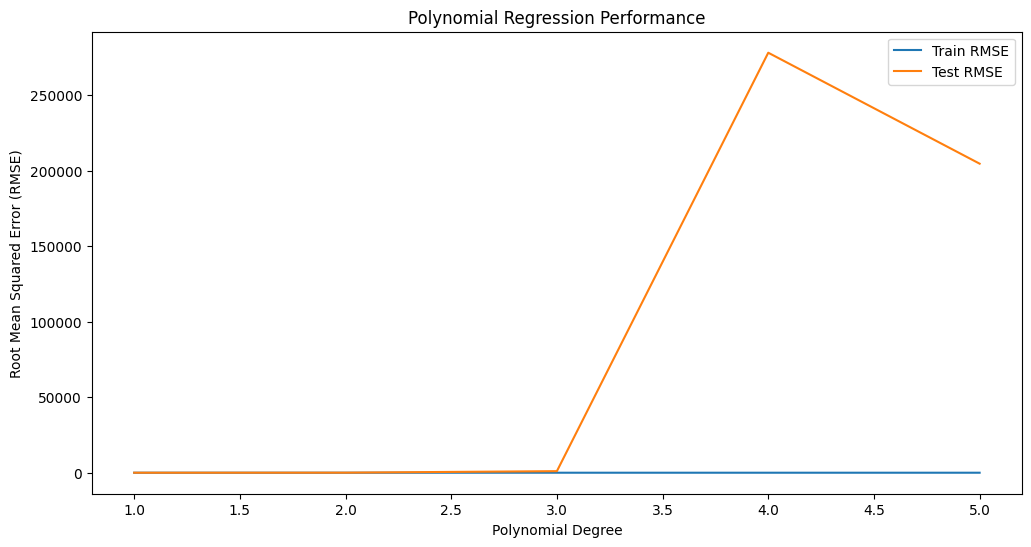

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the results of polynomial regression
plt.figure(figsize=(12, 6))
sns.lineplot(x="Degree", y="Train_RMSE", data=results_df, label="Train RMSE")
sns.lineplot(x="Degree", y="Test_RMSE", data=results_df, label="Test RMSE")
plt.title("Polynomial Regression Performance")
plt.xlabel("Polynomial Degree")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.legend()
plt.show()



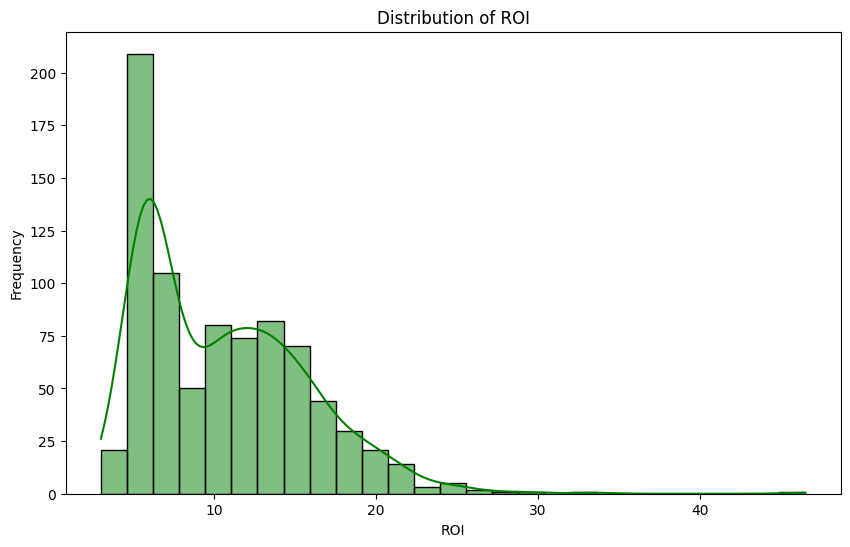

In [46]:
# Plotting the distribution of the target variable (ROI)
plt.figure(figsize=(10, 6))
sns.histplot(data_copy['ROI'], kde=True, color='green')
plt.title("Distribution of ROI")
plt.xlabel("ROI")
plt.ylabel("Frequency")
plt.show()
